In [126]:
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import Normalizer 
import numpy as np
import matplotlib.pyplot as plt



In [127]:
with open("Player Totals.csv", "r", encoding="utf8") as in_file:
    df = pd.read_csv(in_file)
    df = df[df['season'] > 1980]

In [128]:
career_df = df[['season', 'player', 'pts', 'trb', 'ast']]
career_df


,season,player,pts,trb,ast
0,2024,A.J. Green,252,64.0,30
1,2024,A.J. Lawson,136,50.0,20
2,2024,AJ Griffin,48,18.0,5
3,2024,Aaron Gordon,1013,471.0,259
4,2024,Aaron Holiday,514,123.0,140
...,...,...,...,...,...
23518,1981,Wes Matthews,552,67.0,199
23519,1981,Wes Matthews,425,72.0,212
23520,1981,Wes Unseld,507,673.0,170
23521,1981,Winford Boynes,287,75.0,37


In [129]:
players = [
    'Christian Braun', 'Bruce Brown', 'Thomas Bryant', 'Kentavious Caldwell-Pope', 'Vlatko Cancar', 'Collin Gillespie', 'Aaron Gordon', 'Jeff Green', 'Markus Howard', 'Bones Hyland', 'Reggie Jackson', 'Nikola Jokic', 'DeAndre Jordan', 'Jamal Murray', 'Zeke Nnaji', 'Jalen Pickett', 'Michael Porter Jr.', 'Davon Reed', 'Ish Smith', 'Julian Strawther', 'Hunter Tyson', 'Peyton Watson', 'Jack White', 
    'Nemanja Bjelica', 'Chris Chiozza', 'Stephen Curry', 'Jeff Dowtin Jr.', 'Draymond Green', 'Andre Iguodala', 'Jonathan Kuminga', 'Damion Lee', 'Kevon Looney', 'Moses Moody', 'Gary Payton II', 'Jordan Poole', 'Otto Porter Jr.', 'Klay Thompson', 'Juan Toscano-Anderson', 'Quinndary Weatherspoon', 'Andrew Wiggins', 'James Wiseman', 
    'Jaylen Adams', 'Giannis Antetokounmpo', 'Thanasis Antetokounmpo', 'D.J. Augustin', 'Elijah Bryant', 'Pat Connaughton', 'Torrey Craig', 'Mamadi Diakite', 'Donte DiVincenzo', 'Bryn Forbes', 'Jrue Holiday', 'Justin Jackson', 'Rodions Kurucs', 'Brook Lopez', 'Sam Merrill', 'Khris Middleton', 'Jordan Nwora', 'Bobby Portis', 'Jeff Teague', 'Axel Toupane', 'P.J. Tucker', 'D.J. Wilson', 
    'Kostas Antetokounmpo', 'Avery Bradley', 'Devontae Cacok', 'Kentavious Caldwell-Pope', 'Alex Caruso', 'Quinn Cook', 'Troy Daniels', 'Anthony Davis', 'Jared Dudley', 'Danny Green', 'Talen Horton-Tucker', 'Dwight Howard', 'LeBron James', 'Kyle Kuzma', 'JaVale McGee', 'Markieff Morris', 'Zach Norvell Jr.', 'Rajon Rondo', 'JR Smith', 'Dion Waiters', 
    'OG Anunoby', 'Chris Boucher', 'Lorenzo Brown', 'Marc Gasol', 'Danny Green', 'Serge Ibaka', 'Kawhi Leonard', 'Jeremy Lin', 'Kyle Lowry', 'Jordan Loyd', 'Patrick McCaw', 'Jodie Meeks', 'CJ Miles', 'Malcolm Miller', 'Greg Monroe', 'Eric Moreland', 'Norman Powell', 'Malachi Richardson', 'Pascal Siakam', 'Jonas Valanciunas', 'Fred VanVleet', 'Delon Wright', 
    'Quinn Cook', 'Stephen Curry', 'Kevin Durant', 'Draymond Green', 'Andre Iguodala', 'Damian Jones', 'Patrick McCaw', 'Kevon Looney', 'Jordan Bell', 'Shaun Livingston', 'Klay Thompson', 'David West', 'Nick Young', 'Zaza Pachulia', 'JaVale McGee', 'Chris Boucher', 'Omri Casspi', 'DeMarcus Cousins', 'Andre Ingram', 'Marcus Derrickson', 
    'Matt Barnes', 'Ian Clark', 'Stephen Curry', 'Kevin Durant', 'Draymond Green', 'Andre Iguodala', 'Damian Jones', 'Shaun Livingston', 'Kevon Looney', 'James Michael McAdoo', 'Patrick McCaw', 'JaVale McGee', 'Zaza Pachulia', 'Klay Thompson', 'Anderson Varejao', 'Briante Weber', 'David West', 
    'Jared Cunningham', 'Matthew Dellavedova', 'Channing Frye', 'Joe Harris', 'Kyrie Irving', 'LeBron James', 'Richard Jefferson', 'Dahntay Jones', 'James Jones', 'Sasha Kaun', 'Kevin Love', 'Jordan McRae', 'Timofey Mozgov', 'Iman Shumpert', 'JR Smith', 'Tristan Thompson', 'Anderson Varejao', 'Mo Williams', 
    'Leandro Barbosa', 'Harrison Barnes', 'Andrew Bogut', 'Stephen Curry', 'Festus Ezeli', 'Draymond Green', 'Justin Holiday', 'Andre Iguodala', 'Ognjen Kuzmic', 'David Lee', 'Shaun Livingston', 'James Michael McAdoo', 'Brandon Rush', 'Marreese Speights', 'Klay Thompson', 
    'Jeff Ayres', 'Aron Baynes', 'Marco Belinelli', 'Matt Bonner', 'Shannon Brown', 'Austin Daye', 'Nando de Colo', 'Boris Diaw', 'Tim Duncan', 'Manu Ginobili', 'Danny Green', 'Damion James', 'Othyus Jeffers', 'Cory Joseph', 'Kawhi Leonard', 'Patty Mills', 'Tony Parker', 'Tiago Splitter', 'Malcolm Thomas', 
    'Ray Allen', 'Chris Andersen', 'Joel Anthony', 'Shane Battier', 'Chris Bosh', 'Mario Chalmers', 'Norris Cole', 'Josh Harrellson', 'Terrel Harris', 'Udonis Haslem', 'Juwan Howard', 'LeBron James', 'James Jones', 'Rashard Lewis', 'Mike Miller', 'Dexter Pittman', 'Jarvis Varnado', 'Dwyane Wade', 
    'Joel Anthony', 'Shane Battier', 'Chris Bosh', 'Mario Chalmers', 'Norris Cole', 'Eddy Curry', 'Mickell Gladness', 'Terrel Harris', 'Udonis Haslem', 'Juwan Howard', 'LeBron James', 'James Jones', 'Mike Miller', 'Dexter Pittman', 'Ronny Turiaf', 'Dwyane Wade', 
    'Alexis Ajinca', 'J.J. Barea', 'Rodrigue Beaubois', 'Corey Brewer', 'Caron Butler', 'Brian Cardinal', 'Tyson Chandler', 'Brendan Haywood', 'Dominique Jones', 'Jason Kidd', 'Ian Mahinmi', 'Shawn Marion', 'Steve Novak', 'Dirk Nowitzki', 'Sasha Pavlovic', 'DeShawn Stevenson', 'Peja Stojakovic', 'Jason Terry', 
    'Shannon Brown', 'Kobe Bryant', 'Andrew Bynum', 'Jordan Farmar', 'Derek Fisher', 'Pau Gasol', 'D.J. Mbenga', 'Adam Morrison', 'Lamar Odom', 'Josh Powell', 'Metta Sandiford-Artest', 'Sasha Vujacic', 'Luke Walton', 
    'Trevor Ariza', 'Shannon Brown', 'Kobe Bryant', 'Andrew Bynum', 'Jordan Farmar', 'Derek Fisher', 'Pau Gasol', 'D.J. Mbenga', 'Chris Mihm', 'Adam Morrison', 'Lamar Odom', 'Josh Powell', 'Vladimir Radmanovic', 'Sun Yue', 'Sasha Vujacic', 'Luke Walton', 
    'Rajon Rondo', 'Tony Allen', 'Ray Allen', 'Kevin Garnett', 'Gabe Pruitt', 'Sam Cassell', 'Tony Allen', 'Eddie House', 'Leon Powe', 'Scot Pollard', 'Paul Pierce', 'Brian Scalabrine', 'Kendrick Perkins', 'Doc Rivers', 
    'Francisco Elson']


In [130]:
import pandas as pd

# Assuming your DataFrame is named df
# First, group the DataFrame by the player name and aggregate the sum of points, rebounds, and assists
grouped_df = career_df.groupby('player').agg({'pts': 'sum', 'trb': 'sum', 'ast': 'sum'}).reset_index()

# Now, merge the grouped DataFrame back with the original DataFrame on the player name
combined_df = pd.merge(career_df, grouped_df, on='player', suffixes=('', '_total'))

# Rename the columns to indicate the total values
combined_df.rename(columns={'pts_total': 'total_pts', 'trb_total': 'total_trb', 'ast_total': 'total_ast'}, inplace=True)

# Now you have a DataFrame with the total values combined for each player
combined_df


,season,player,pts,trb,ast,total_pts,total_trb,total_ast
0,2024,A.J. Green,252,64.0,30,406,109.0,52
1,2024,A.J. Lawson,136,50.0,20,248,92.0,24
2,2024,AJ Griffin,48,18.0,5,687,171.0,78
3,2024,Aaron Gordon,1013,471.0,259,9627,4511.0,1936
4,2024,Aaron Holiday,514,123.0,140,2957,753.0,970
...,...,...,...,...,...,...,...,...
23518,1981,Wes Matthews,552,67.0,199,4781,792.0,2449
23519,1981,Wes Matthews,425,72.0,212,4781,792.0,2449
23520,1981,Wes Unseld,507,673.0,170,507,673.0,170
23521,1981,Winford Boynes,287,75.0,37,287,75.0,37


In [131]:
combined_df[combined_df['player'] == 'LeBron James']

,season,player,pts,trb,ast,total_pts,total_trb,total_ast
449,2024,LeBron James,1822,518.0,589,40474,11185.0,11009
1149,2023,LeBron James,1590,457.0,375,40474,11185.0,11009
1916,2022,LeBron James,1695,459.0,349,40474,11185.0,11009
2655,2021,LeBron James,1126,346.0,350,40474,11185.0,11009
3337,2020,LeBron James,1698,525.0,684,40474,11185.0,11009
4006,2019,LeBron James,1505,465.0,454,40474,11185.0,11009
4692,2018,LeBron James,2251,709.0,747,40474,11185.0,11009
5310,2017,LeBron James,1954,639.0,646,40474,11185.0,11009
5909,2016,LeBron James,1920,565.0,514,40474,11185.0,11009
6522,2015,LeBron James,1743,416.0,511,40474,11185.0,11009


In [132]:
unique_players_df = combined_df.drop_duplicates(subset=['player'])
unique_players_df

,season,player,pts,trb,ast,total_pts,total_trb,total_ast
0,2024,A.J. Green,252,64.0,30,406,109.0,52
1,2024,A.J. Lawson,136,50.0,20,248,92.0,24
2,2024,AJ Griffin,48,18.0,5,687,171.0,78
3,2024,Aaron Gordon,1013,471.0,259,9627,4511.0,1936
4,2024,Aaron Holiday,514,123.0,140,2957,753.0,970
...,...,...,...,...,...,...,...,...
23513,1981,Walter Jordan,68,42.0,11,68,42.0,11
23515,1981,Wayne Kreklow,30,12.0,9,30,12.0,9
23516,1981,Wayne Robinson,643,294.0,112,643,294.0,112
23520,1981,Wes Unseld,507,673.0,170,507,673.0,170


In [133]:
unique_players_df[unique_players_df['player'] == 'LeBron James']

,season,player,pts,trb,ast,total_pts,total_trb,total_ast
449,2024,LeBron James,1822,518.0,589,40474,11185.0,11009


In [134]:
unique_players_df = unique_players_df.sort_values(by='total_pts', ascending=False)

In [150]:
filtered_df = unique_players_df[unique_players_df['player'].isin(players)]
filtered_df.sort_values(by='total_pts', ascending=False).head(10)

,season,player,pts,trb,ast,total_pts,total_trb,total_ast
449,2024,LeBron James,1822,518.0,589,40474,11185.0,11009
5886,2016,Kobe Bryant,1161,247.0,184,33643,7047.0,6306
3747,2019,Dirk Nowitzki,373,158.0,35,31560,11489.0,3651
415,2024,Kevin Durant,2032,495.0,378,30290,7767.0,4880
6082,2016,Tim Duncan,522,447.0,163,26496,15091.0,4225
5407,2017,Paul Pierce,81,48.0,10,26397,7527.0,4708
5874,2016,Kevin Garnett,122,150.0,62,26394,14973.0,5522
7265,2014,Ray Allen,701,205.0,143,26218,5653.0,4695
3763,2019,Dwyane Wade,1083,285.0,301,23930,5185.0,5929
650,2024,Stephen Curry,1956,330.0,379,23668,4509.0,6119


In [136]:
model_df = filtered_df[['total_pts', 'total_trb', 'total_ast']].sort_values(by='total_pts', ascending=False)
model_df

,total_pts,total_trb,total_ast
449,40474,11185.0,11009
5886,33643,7047.0,6306
3747,31560,11489.0,3651
415,30290,7767.0,4880
6082,26496,15091.0,4225
...,...,...,...
6039,23,26.0,3
2638,21,23.0,3
250,20,9.0,2
2434,16,6.0,3


In [137]:
#Clustering Model

from sklearn.cluster import KMeans
import sklearn

In [138]:
rows = []
for k in range(2, 30):
    model = KMeans(n_clusters=k, n_init="auto")
    model.fit(model_df)
    rows.append({
        "k": k,
        "inertia": model.inertia_,
    })

    print(k, model.inertia_)

2 5121349813.122416
3 3074851314.3002067
4 1988021226.7043304
5 1709560879.243723
6 1474803665.9377933
7 1208898630.913165
8 1180161521.0492604
9 1053331777.9954009
10 890244277.0063571
11 714564706.6032785
12 675052318.2782093
13 622180676.9502382
14 530881716.9055434
15 509360566.1251987
16 445867994.10351866
17 415127696.9704355
18 346807711.50763994
19 334556270.3563119
20 336420812.44101214
21 319996055.6667261
22 260689441.03996977
23 251691821.908769
24 246140268.12717956
25 232245988.04376706
26 218007077.50203657
27 205043190.81900424
28 200880824.08095935
29 189664500.276819


<Axes: xlabel='k'>

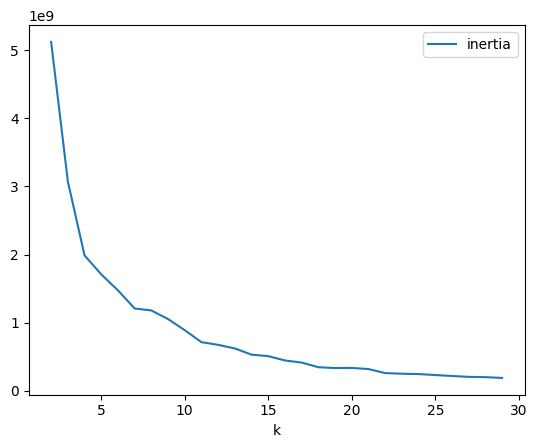

In [139]:
pd.DataFrame(rows).set_index("k").plot()

Based on the chart using the elbow method, 8 clusters seems appropriate

In [140]:
model_df.columns = model_df.columns.astype(str)

In [141]:
model = KMeans(n_clusters=6)
model.fit(model_df)


KMeans(n_clusters=6)

In [142]:
model.cluster_centers_.shape
model.inertia_


1445246453.3253703

In [143]:
cluster_assigned_df = pd.DataFrame(model.predict(model_df), columns=['cluster_id'])
cluster_assigned_df.index = model_df.index

cluster_assigned_df

,cluster_id
449,5
5886,5
3747,5
415,5
6082,5
...,...
6039,1
2638,1
250,1
2434,1


In [144]:
cluster_assigned_df['cluster_id'].value_counts()

cluster_id
1    98
3    54
2    29
0    11
4    10
5     6
Name: count, dtype: int64

In [145]:
for i in range(6):
    this_cluster = cluster_assigned_df[cluster_assigned_df['cluster_id'] == i]
    print('Cluster', i, this_cluster.shape[0])

    this_genre_counts = pd.DataFrame(model_df.loc[this_cluster.index].sum(axis=0), columns=['count'])
    display(this_genre_counts.sort_values(by="count", ascending=False).head(5))

Cluster 0 11


,count
total_pts,199316.0
total_trb,99899.0
total_ast,27290.0


Cluster 1 98


,count
total_pts,138168.0
total_trb,70295.0
total_ast,28079.0


Cluster 2 29


,count
total_pts,367831.0
total_trb,150069.0
total_ast,92889.0


Cluster 3 54


,count
total_pts,375271.0
total_trb,167836.0
total_ast,78887.0


Cluster 4 10


,count
total_pts,211015.0
total_ast,65784.0
total_trb,51186.0


Cluster 5 6


,count
total_pts,188857.0
total_trb,67552.0
total_ast,35593.0


In [154]:
cluster_assigned_df = pd.DataFrame(model.predict(model_df), columns=['cluster_id'])
cluster_assigned_df.index = filtered_df['player']

cluster_assigned_df[cluster_assigned_df['cluster_id'] == 3]

,cluster_id
player,
Leandro Barbosa,3
Aaron Gordon,3
Kentavious Caldwell-Pope,3
Corey Brewer,3
Marco Belinelli,3
Greg Monroe,3
Nick Young,3
Shane Battier,3
Norman Powell,3
